In [1]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("botswana.tsv",sep="\t")

In [4]:
data

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4357,2,28,7,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4358,4,24,5,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0


In [5]:
 data.describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
count,4361.000000,4361.000000,4361.000000,4241.000000,4354.000000,4290.000000,4361.000000,2079.000000,1956.000000,4361.000000,4358.000000,4359.000000,4359.000000,4358.000000
mean,2.441642,27.405182,5.855996,4.615892,0.963252,0.577622,0.476726,20.686388,5.144683,0.516625,0.140202,0.701766,0.092911,0.275815
std,2.406861,8.685233,3.927075,2.219303,0.188164,0.493996,0.499515,5.002383,4.803028,0.499781,0.347236,0.457535,0.290341,0.446975
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,20.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,1.000000,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data['religion'].value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

In [13]:
data['religion'].nunique()

4

In [10]:
# answer_01
answer_01=4

In [6]:
data.dropna()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0
5,1,30,5,spirit,5.0,1.0,0.0,1,24.0,7.0,1,1.0,0.0,0.0,0.0
6,3,42,4,other,3.0,1.0,0.0,1,15.0,11.0,1,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,9,49,0,protestant,5.0,0.0,0.0,1,15.0,0.0,0,0.0,1.0,0.0,0.0
4354,3,31,2,protestant,4.0,1.0,1.0,1,18.0,0.0,0,0.0,1.0,0.0,0.0
4355,4,27,6,protestant,4.0,1.0,1.0,1,17.0,7.0,0,0.0,0.0,0.0,0.0
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0


In [8]:
# answer_02
answer_02=1834

In [36]:
data

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,NaN,0,0.0,1.0,0.0,0.0,1
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,NaN,0,0.0,1.0,0.0,0.0,1
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,NaN,0,0.0,1.0,0.0,0.0,1
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0


In [15]:
import math

In [ ]:
data["nevermarr"]=[(1-i) for i in data["evermarr"]]
data["agefm"]=[i if not(math.isnan(i)) else 0 for i in data["agefm"]]  #data["agefm_handle"]
data=data.drop(columns=["evermarr"])

In [ ]:
#df.loc[df['a'] > 10, ['a','c']] 

In [37]:
data["heduc"]=[i if (data.loc[index,"nevermarr"]==0) else -1 for (index,i) in enumerate(data["heduc"])]

In [62]:
data["heduc"].isna().sum() #sum(math.isnan(np.asarray(data["heduc"].data())))

123

In [63]:
# answer_03
answer_03=123

In [65]:
# idlnchld_noans, heduc_noans, usemeth_noans

In [79]:
data["idlnchld_noans"]=[1 if math.isnan(i) else 0 for i in data["idlnchld"]] # data["idlnchld_noans"]=[1 if data.loc[index,"idlnchld"].isna() else 0 for (index,i) in enumerate(data["heduc"])]
data["heduc_noans"]=[1 if math.isnan(i) else 0 for i in data["heduc"]]
data["usemeth_noans"]=[1 if math.isnan(i) else 0 for i in data["usemeth"]]

In [70]:
data["idlnchld"].isna().sum()

120

In [90]:
# np.argwhere(np.isnan(data["idlnchld"].to_numpy()))

In [77]:
# data.iloc[28,:]

In [76]:
data["idlnchld_noans"].sum()

120

In [80]:
data

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0,0,0,0


In [81]:
data["idlnchld"]=[-1 if math.isnan(i) else i for i in data["idlnchld"]] # data["idlnchld_noans"]=[1 if data.loc[index,"idlnchld"].isna() else 0 for (index,i) in enumerate(data["heduc"])]
data["heduc"]=[-2 if math.isnan(i) else i for i in data["heduc"]]
data["usemeth"]=[-1 if math.isnan(i) else i for i in data["usemeth"]]

In [86]:
data=data.dropna()

In [87]:
data.shape

(4348, 18)

In [89]:
data.count().sum()

78264

In [91]:
# answer_04
answer_04=78264

In [92]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban +'\
                    'electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:39:54   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [93]:
# answer_05
answer_05=0.644
# answer_06
answer_06=3

In [95]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\bashkatovaa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


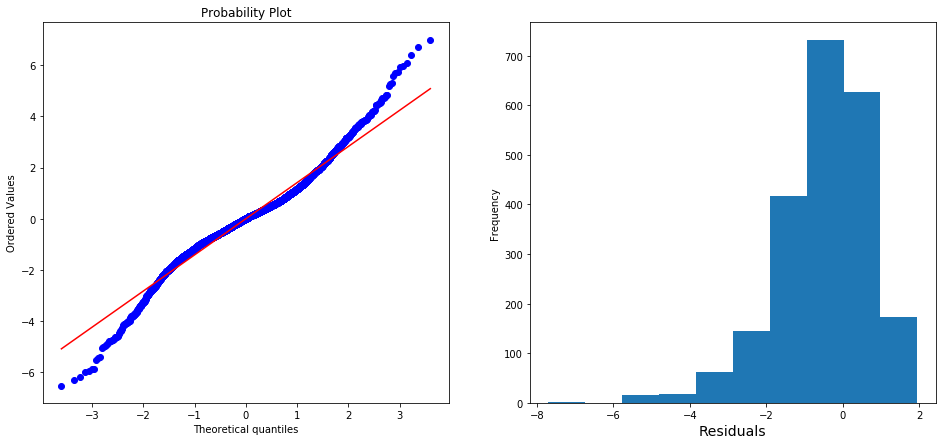

In [96]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

In [97]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [99]:
# answer_07
answer_07='heterosced < 0.05'

In [98]:
fitted = m1.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:45:43   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [100]:
data2=data.drop(columns=["religion","radio","tv"])

In [101]:
data2

,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1,0,0,0
1,2,43,11,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,0,0,0,0
2,0,49,4,4.0,1.0,0.0,22.0,1.0,1,1.0,0.0,0,0,0,0
3,0,24,12,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1,0,0,0
4,3,32,13,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,2.0,1.0,0.0,0.0,-1.0,0,0.0,0.0,1,0,0,0
4357,2,28,7,4.0,1.0,1.0,0.0,-1.0,0,0.0,0.0,1,0,0,0
4358,4,24,5,4.0,1.0,1.0,0.0,-1.0,0,0.0,0.0,1,0,0,0
4359,1,26,0,5.0,1.0,0.0,22.0,7.0,0,0.0,0.0,0,0,0,0


In [102]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban +'\
                    'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data)
fitted = m2.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:48:51   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [103]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m2.fit()))

F=0.919236, p=0.467231, k1=5.000000


In [104]:
# answer_08
answer_08=0.4672

In [105]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban +'\
                    'electric + bicycle + nevermarr + idlnchld_noans + heduc_noans', 
             data=data)
fitted = m3.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     611.3
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:53:00   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.202     -5.

In [106]:
print("F=%f, p=%f, k1=%f" % m2.fit().compare_f_test(m3.fit()))

F=92.890582, p=0.000000, k1=2.000000


In [108]:
(F,p,k1)=m2.fit().compare_f_test(m3.fit())

In [109]:
p

3.1552009480386492e-40

In [110]:
# answer_09
answer_09=40

In [113]:
itog_model = m2.fit(cov_type='HC1') #
print(itog_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:58:08   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [ ]:
# answer_10
answer_10="nanIdln -> sred+0.58  ;  +1year=+0.17   ;  nevermarr -> -2.25   ;  "